<h1><center></center></h1><hr>
<h1><center><b>Car Price Prediction with Machine Learning<hr>
</center></h1>

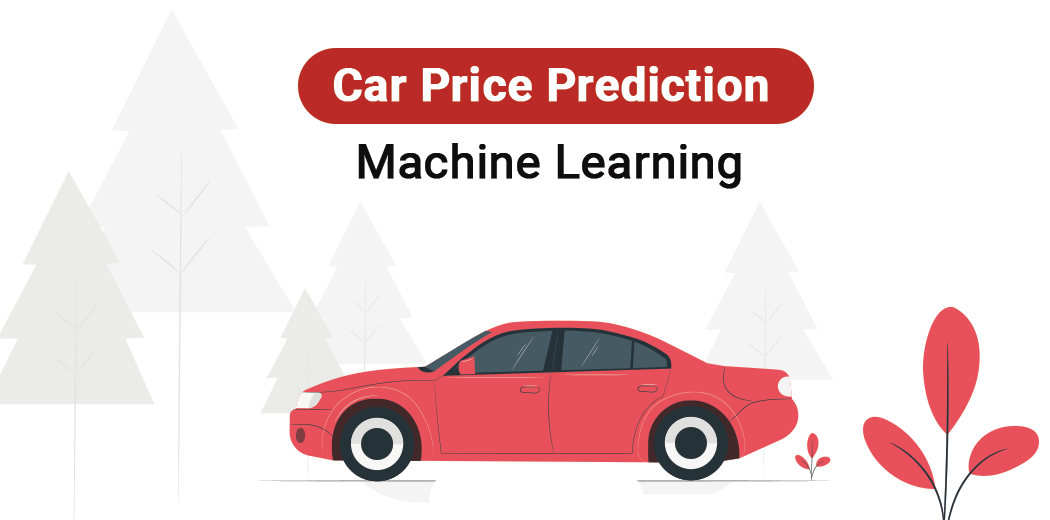

# Table of Contents:
1. <a href='#busund'>Business Understanding</a>


2. <a href='#dataund'>Data Understanding : Exploratory Data Analysis</a>


3. <a href='#prepro'>Data Preparation : Data Pre-Processing</a>


4. <a href='#Visualization'>Data Visualization</a>


5. <a href='#modeling'>Modeling</a>

     5.1. <a href='#modelb'>Model Building</a>
   
     5.2. <a href='#evaluation'>Evaluation</a>

     5.3. <a href='#modelc'>Model Comparison</a>

<br><br>
<hr><hr>

# **1 | <a id='busund' style="color:#000000;">Business Understanding</a>**

Buying or selling a used car can be challenging because prices vary based on many factors. This project aims to build a model that predicts the selling price of a car based on details like its age, original price, kilometers driven, fuel type, transmission, and ownership history. A good price prediction can help sellers set fair prices and help buyers know if they are getting a good deal. This makes the process more transparent and efficient for everyone in the used car market.

<strong><h3>About Dataset</h3></strong>
<blockquote>
<div class="alert alert-primary" style="margin-top: 20px">
<p>
This dataset consists of 301 records and 9 variables, providing information to predict the selling price of used cars. It includes details such as the car’s name, manufacturing year, current market price, kilometers driven, fuel type, selling type, transmission type, and ownership history. The target variable, Selling_Price, represents the actual price at which the car is sold. This dataset helps in understanding how different factors influence the resale value of a vehicle.
 </blockquote></p>

---
<strong><h3>key features</h3></strong>
<blockquote>

* Car Name – The name or model of the car. This is a categorical variable that may help identify trends based on brand popularity.

* Year – The year in which the car was manufactured. Older cars typically have lower resale values.

* Present Price – The current market price of the car when new. This helps determine how much value the car has lost over time.

* Driven Kilometers – The total number of kilometers the car has been driven. Higher mileage often leads to lower selling prices due to wear and tear.
Fuel Type – The type of fuel used by the car such as Petrol Diesel or CNG. Fuel efficiency and availability impact resale value.

* Selling Type – Indicates whether the car is sold by an individual or a dealer. Dealers may influence the price differently compared to individual sellers.

* Transmission – The type of transmission such as Manual or Automatic. Automatic cars are often priced higher than manual ones.

* Owner – Represents the number of previous owners where 0 means first owner 1 means second owner etc. More owners generally reduce the car’s resale price.
</blockquote>
---
<strong><h3>Target Feature</h3></strong>
<blockquote>  

The target feature, <strong>  Selling Price</strong> represents the final price at which the car is sold. This is the variable the model aims to predict based on the other features.
</blockquote>  



# **2 | <a id='dataund' style="color:#000000;">Data Understanding : Exploratory Data Analysis</a>**

#####  **Import the necessary libraries**

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#####  **Load data**

In [5]:
# Load Data
df= pd.read_csv("/content/drive/MyDrive/CodeAlpha/car price prediction/car data.csv")

##### **Preview Data**

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


##### **DataFrame Shape**

In [ ]:
df.shape

(301, 9)

##### **DataFrame Overview**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


##### **Statistical summary of data**

In [ ]:
# statistical summary of data
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


##### **Missing Values Count**

In [ ]:
df.isna().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


##### **Check for Duplicate Rows**

In [ ]:
# Check for duplicate rows in DataFrame 'df'
duplicate_rows = df.duplicated()

# Display the duplicate rows
df[duplicate_rows]


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


##### **Detecting Outliers**

In [ ]:
# Define categorical & numerical features
categorical_features = ["Fuel_Type", "Selling_type", "Transmission"]
numerical_features = ["Year", "Present_Price", "Driven_kms", "Owner"]

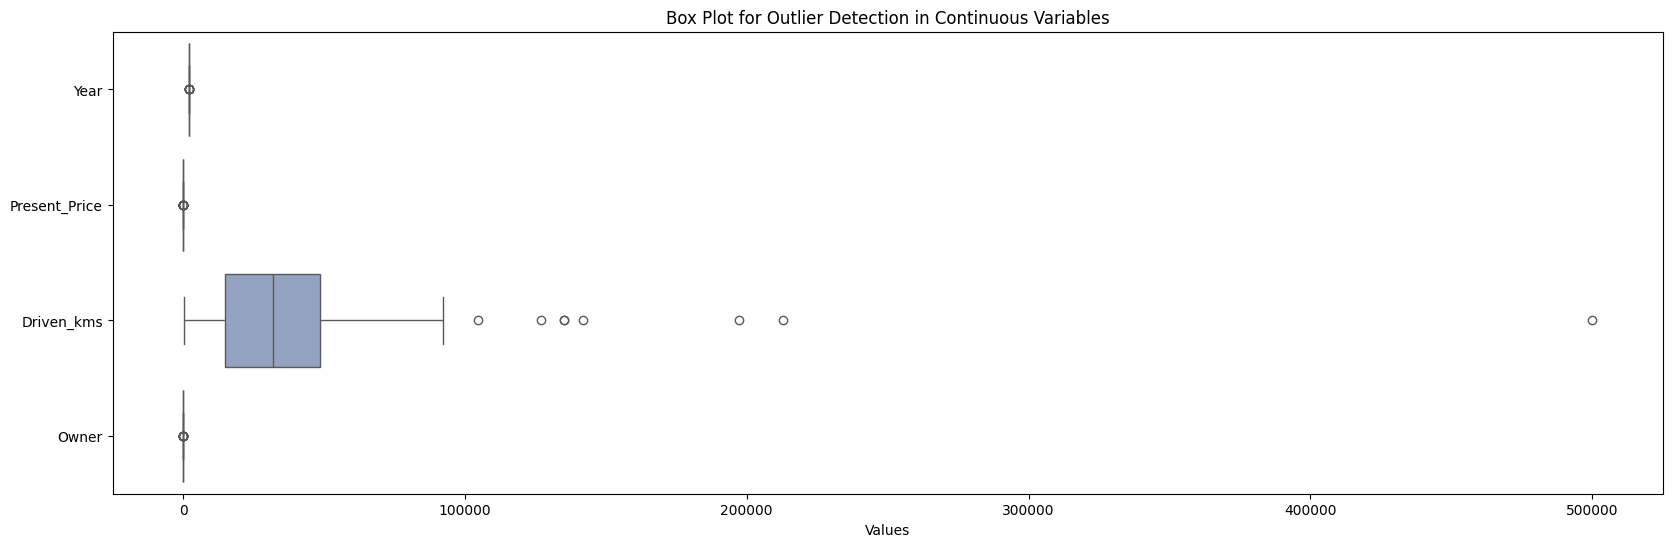

In [ ]:
# Create a box plot to visualize outliers for continuous variables only
plt.figure(figsize=(20, 6))

# Use seaborn to draw a box plot for specified continuous variables
sns.boxplot(data=df[numerical_features], orient="h", palette="Set2")

# Add titles and labels
plt.title("Box Plot for Outlier Detection in Continuous Variables")
plt.xlabel("Values")

# Display the box plot
plt.show()

After performing Exploratory Data Analysis (EDA), we concluded that:

* Car Name is a useless column and can be removed.
* Outliers were detected in the Driven_Kms column.
* Two duplicate rows were found and should be removed.
* 3 categorical columns need to be encoded.
* 4 numerical columns require normalization using StandardScaler.

# **3 | <a id='prepro' style="color:#000000;" >Data Preparation : Pre-Processing</a>**

In [ ]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


#####  **Drop useless column**

In [ ]:
df.drop(columns=["Car_Name"], inplace=True)  # Drop 'Car_Name' (not useful for prediction)


#####  **Drop duplicate rows**

In [ ]:
df.drop_duplicates(inplace=True)


#####  **Handling Outliers**

Number of rows before removing outliers: 299
Number of rows after removing outliers: 291


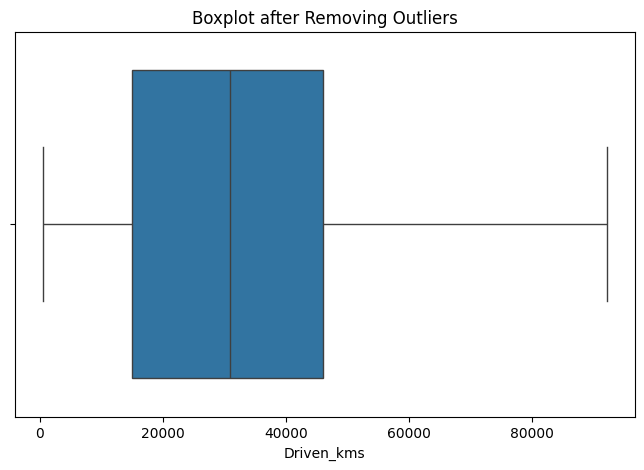

In [ ]:
print(f"Number of rows before removing outliers: {df.shape[0]}")

# Detect outliers using the IQR method
Q1 = df["Driven_kms"].quantile(0.25)  # First quartile
Q3 = df["Driven_kms"].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Set the thresholds to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the non-outlier values directly in df
df = df[(df["Driven_kms"] >= lower_bound) & (df["Driven_kms"] <= upper_bound)]

# Print the number of rows before and after removing outliers
print(f"Number of rows after removing outliers: {df.shape[0]}")

# Verify if the outliers have been removed
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Driven_kms"])
plt.title("Boxplot after Removing Outliers")
plt.show()

#####  **Normalization**

In [ ]:
# Initialisation du scaler
scaler = StandardScaler()

# Transformation et remplacement dans le DataFrame
df[numerical_features] = scaler.fit_transform(df[numerical_features])


#####  **Label Encoding**

In [ ]:
print(df["Fuel_Type"].unique())
print(df["Selling_type"].unique())
print(df["Transmission"].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [ ]:
# Initialize the LabelEncoder
label_encoders = {}

# Apply label encoding to specified columns
for col in categorical_features:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_encoders[col] = label_encoder
    print(f"{col} classes: {label_encoder.classes_}")


Fuel_Type classes: ['CNG' 'Diesel' 'Petrol']
Selling_type classes: ['Dealer' 'Individual']
Transmission classes: ['Automatic' 'Manual']


In [ ]:
print(df["Fuel_Type"].unique())
print(df["Selling_type"].unique())
print(df["Transmission"].unique())

[2 1 0]
[0 1]
[1 0]


In [ ]:
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,0.081716,3.35,-0.210981,-0.260552,2,0,1,-0.188646
1,-0.289836,4.75,0.261320,0.485040,1,0,1,-0.188646
2,1.196370,7.25,0.298386,-1.197202,2,0,1,-0.188646
3,-1.032939,2.85,-0.383162,-1.276421,2,0,1,-0.188646
4,0.081716,4.60,-0.057932,0.459410,1,0,1,-0.188646
...,...,...,...,...,...,...,...,...
296,0.824819,9.50,0.507633,0.065085,1,0,1,-0.188646
297,0.453267,4.00,-0.173914,1.277231,2,0,1,-0.188646
298,-1.776042,3.35,0.435891,2.578941,2,0,1,-0.188646
299,1.196370,11.50,0.615246,-1.099343,1,0,1,-0.188646


##### **X-y Split**

In [ ]:
X = df.drop(columns=["Selling_Price"])  # Features
y = df["Selling_Price"]  # Target variable

##### **Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4 | <a id='Visualization' style="color:#000000;">Data Visualization</a>**

###### **1 |  Distribution of Selling Price**

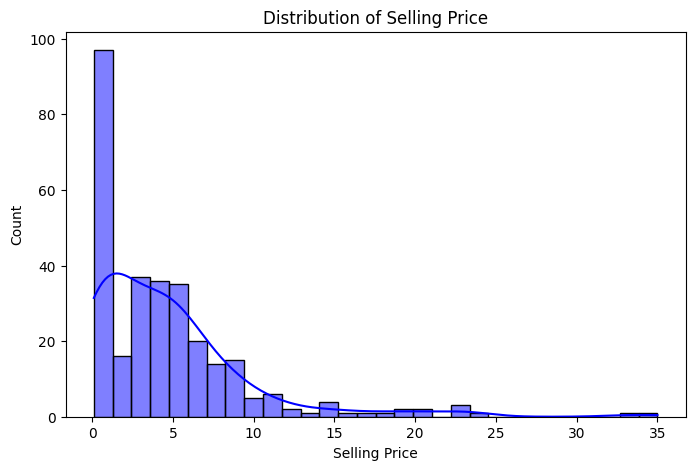

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Selling_Price"], bins=30, kde=True, color='blue')
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.show()

###### **2 |  Number of Cars by Fuel Type**

<ipython-input-6-7f76f642e113>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Fuel_Type"], palette="pastel")


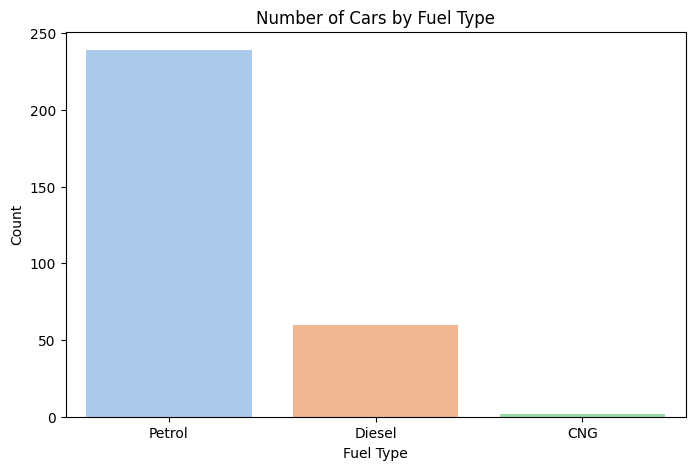

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["Fuel_Type"], palette="pastel")
plt.title("Number of Cars by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

###### **3 |  Correlation Heatmap**

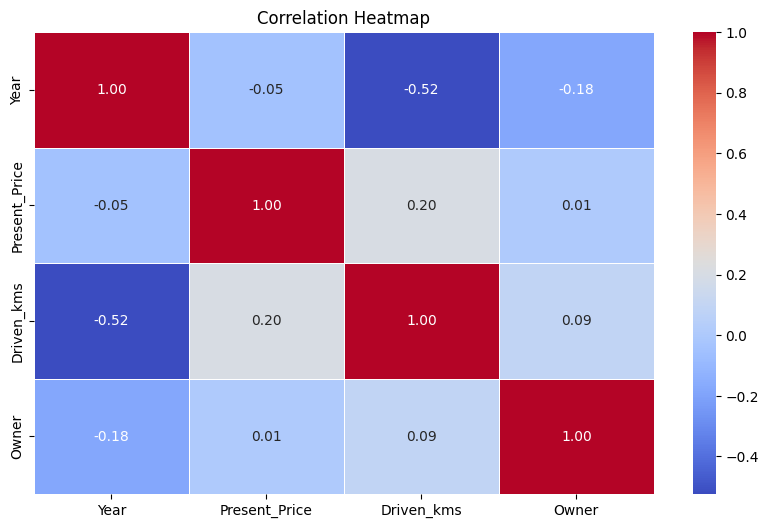

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

###### **4 |  Number of Cars by Transmission Type**

<ipython-input-10-f2fc4e62211b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Transmission"], palette="coolwarm")


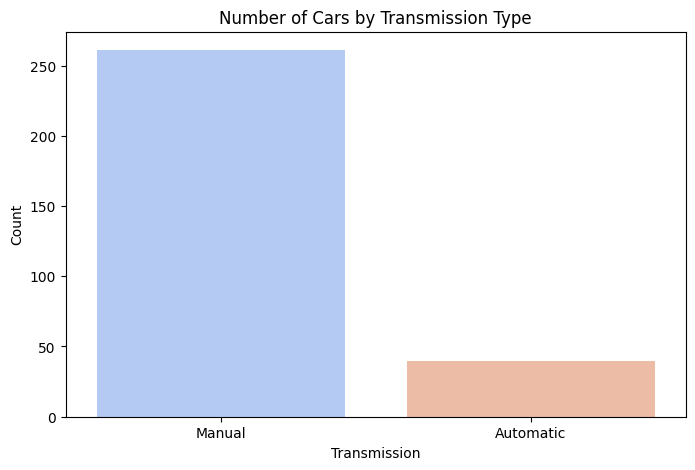

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["Transmission"], palette="coolwarm")
plt.title("Number of Cars by Transmission Type")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.show()

###### **5 |  Distribution of Car Manufacturing Year**

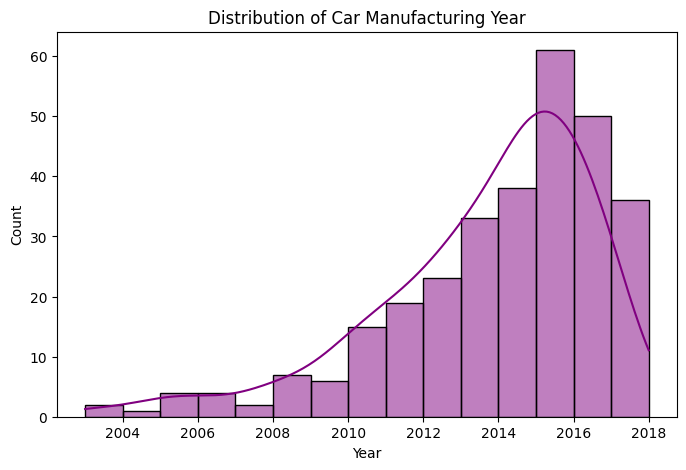

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Year"], bins=15, kde=True, color="purple")
plt.title("Distribution of Car Manufacturing Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

###### **6 |  Number of Cars by Selling Type**

<ipython-input-12-025808870ada>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Selling_type"], palette="Set2")


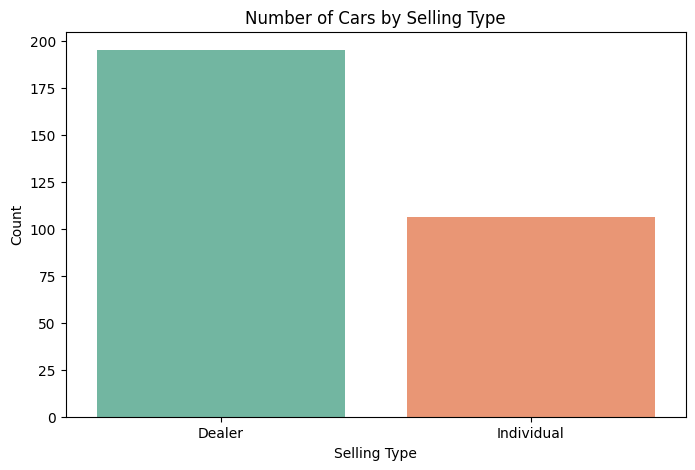

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Selling_type"], palette="Set2")
plt.title("Number of Cars by Selling Type")
plt.xlabel("Selling Type")
plt.ylabel("Count")
plt.show()

###### **7 |  Distribution of Cars by Number of Previous Owners**

<ipython-input-14-ee1fd4be4098>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Owner"], palette="coolwarm")


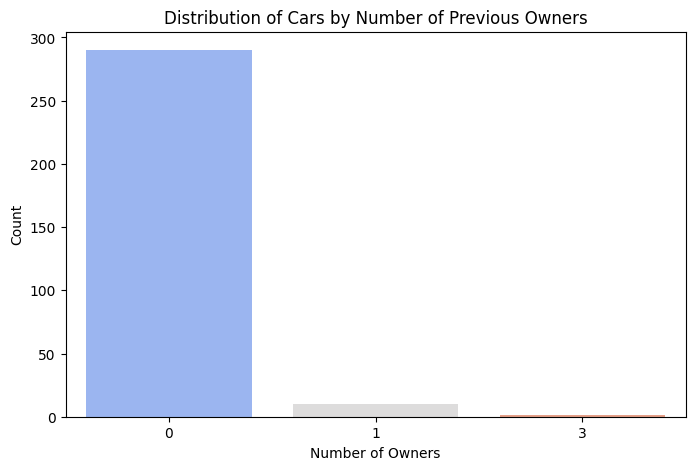

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Owner"], palette="coolwarm")
plt.title("Distribution of Cars by Number of Previous Owners")
plt.xlabel("Number of Owners")
plt.ylabel("Count")
plt.show()

###### **8 |  Selling Price Comparison by Year and Fuel Type**

<ipython-input-22-2df00ff7d924>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df[df["Fuel_Type"] == fuel], x="Year", y="Selling_Price",
<ipython-input-22-2df00ff7d924>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df[df["Fuel_Type"] == fuel], x="Year", y="Selling_Price",
<ipython-input-22-2df00ff7d924>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df[df["Fuel_Type"] == fuel], x="Year", y="Selling_Price",


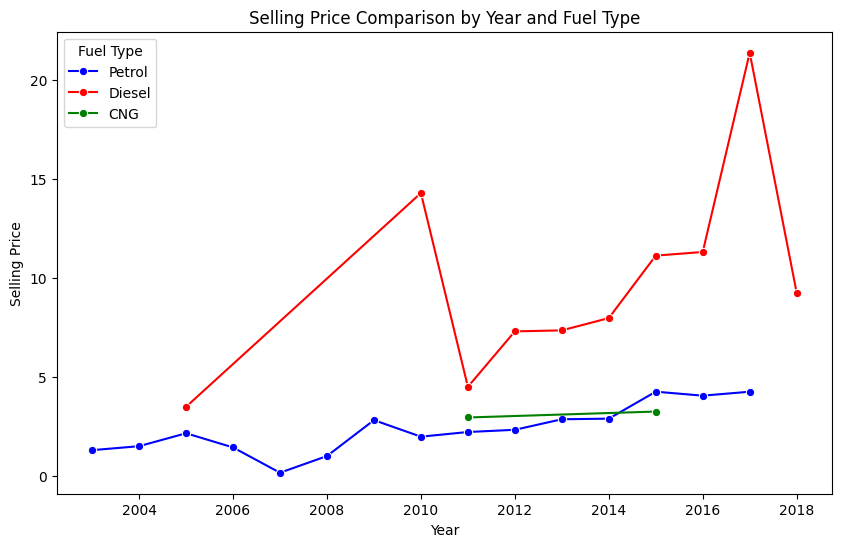

In [ ]:
plt.figure(figsize=(10, 6))

# Tracer les courbes pour chaque type de carburant
fuel_types = df["Fuel_Type"].unique()
colors = ["blue", "red", "green"]  # Adapter les couleurs si nécessaire

for fuel, color in zip(fuel_types, colors):
    sns.lineplot(data=df[df["Fuel_Type"] == fuel], x="Year", y="Selling_Price",
                 marker="o", label=fuel, color=color, ci=None)

plt.title("Selling Price Comparison by Year and Fuel Type")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.legend(title="Fuel Type")
plt.show()


###### **9 |  Selling Price Trend Over Years**

<ipython-input-21-7114dbd80384>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df["Year"], y=df["Selling_Price"], marker="o", color="blue", ci=None)


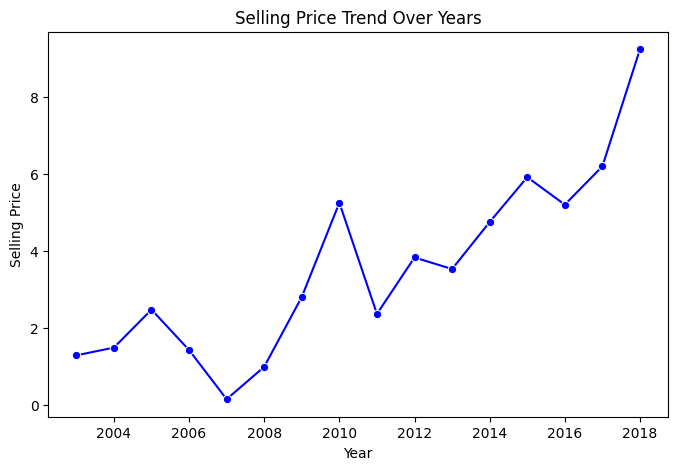

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=df["Year"], y=df["Selling_Price"], marker="o", color="blue", ci=None)

plt.title("Selling Price Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

###### **10 |  Selling Price Comparison by Year and Transmission Type**

<ipython-input-20-772fb2f7ed09>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df[df["Transmission"] == "Manual"], x="Year", y="Selling_Price",
<ipython-input-20-772fb2f7ed09>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df[df["Transmission"] == "Automatic"], x="Year", y="Selling_Price",


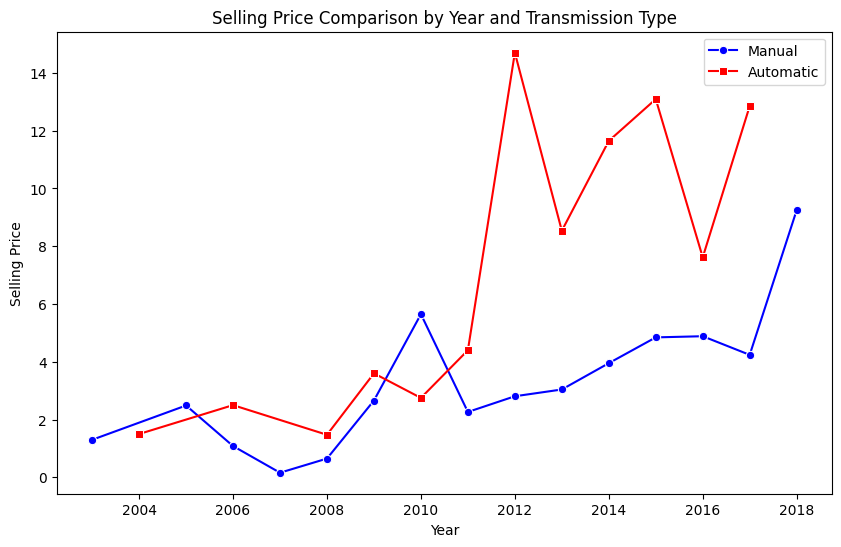

In [ ]:
plt.figure(figsize=(10, 6))

# Tracer les voitures manuelles
sns.lineplot(data=df[df["Transmission"] == "Manual"], x="Year", y="Selling_Price",
             marker="o", label="Manual", color="blue", ci=None)


# Tracer les voitures automatiques
sns.lineplot(data=df[df["Transmission"] == "Automatic"], x="Year", y="Selling_Price",
             marker="s", label="Automatic", color="red", ci=None)


plt.title("Selling Price Comparison by Year and Transmission Type")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.legend()
plt.show()

# **5 | <a id='#modeling' style="color:#000000;">Modeling</a>**

### **5.1 |  <a id='modelb' style="color:#708197;" >Model Building</a>**

###### **1 |  Linear Regression**

In [ ]:
# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_lr = lr.predict(X_test)

###### **2 |  Random Forest Regressor**

In [ ]:

# Initialize the RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_rf = rf.predict(X_test)



###### **3 |  Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor


# Initialize the Decision Tree Regressor model
dt = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_dt =dt.predict(X_test)

###### **4 |  Ridge**

In [ ]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model
ri = Ridge(alpha=1.0)  # alpha is the regularization strength, adjust it for tuning

# Fit the model to the training data
ri.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_ri = ri.predict(X_test)


###### **5 |  SVR**

In [ ]:
from sklearn.svm import SVR


# Initialize the Support Vector Regression model
sv = SVR()  # You can adjust the kernel, C, and epsilon for tuning

# Fit the model to the training data
sv.fit(X_train, y_train)

# Predict the target variable
y_pred_svr = sv.predict(X_test)

### **5.2 |  <a id='evaluation' style="color:#708197;" >Evaluation</a>**

In [ ]:
# Initialize an empty DataFrame to store model results
results_df = pd.DataFrame(columns=["Model", "MAE","MSE", "RMSE", "R² Score"])

def evaluate_model(model_name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mse=mean_squared_error(y_test, y_pred)


    # Print model evaluation metrics
    print(f"Model: {model_name}")
    print(f"MAE: {mae:.4f}")
    print(f"MASE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}\n")

    # Store results in the DataFrame
    global results_df  # Allows modifying the global variable
    results_df = pd.concat([results_df, pd.DataFrame([[model_name, mae,mse, rmse, r2]],
                                                      columns=["Model", "MAE","MSE", "RMSE", "R² Score"])], ignore_index=True)


###### **1 |  Linear Regression**

In [ ]:
evaluate_model("Linear Regression", y_test, y_pred_lr)

Model: Linear Regression
MAE: 1.5393
MASE: 7.1178
RMSE: 2.6679
R² Score: 0.8645



<ipython-input-90-75327222b789>:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([[model_name, mae,mse, rmse, r2]],


###### **2 |  Random Forest Regressor**

In [ ]:
evaluate_model("Random Forest Regressor", y_test, y_pred_rf)

Model: Random Forest Regressor
MAE: 1.1510
MASE: 11.1108
RMSE: 3.3333
R² Score: 0.7884



###### **3 |  Decision Tree Regressor**

In [ ]:
evaluate_model("Decision Tree Regressor", y_test, y_pred_dt)

Model: Decision Tree Regressor
MAE: 1.1868
MASE: 8.4943
RMSE: 2.9145
R² Score: 0.8383



###### **4 |  Ridge**

In [ ]:
evaluate_model("Ridge", y_test, y_pred_ri)

Model: Ridge
MAE: 1.5303
MASE: 6.9485
RMSE: 2.6360
R² Score: 0.8677



###### **5 |  SVR**

In [ ]:
evaluate_model("SVR", y_test, y_pred_svr)

Model: SVR
MAE: 2.0545
MASE: 31.6931
RMSE: 5.6297
R² Score: 0.3965



### **5.3 |  <a id='modelc' style="color:#708197;" >Model Comparison</a>**

 I trained and evaluated machine learning models on the car dataset using two different approaches. First, I applied a full preprocessing pipeline that included handling missing values, encoding categorical variables, and scaling numerical features. In the second approach, I simplified the preprocessing steps by only applying label encoding for categorical features and normalization (standard scaling) for numerical features. Both approaches were used to train various regression models, and their performances were compared in terms of evaluation metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² score.

###### **1 |  With all preprocessing steps**

In [ ]:
results_df.sort_values(by='R² Score', ascending=False)

,Model,MAE,MSE,RMSE,R² Score
3,Ridge,1.530251,6.948534,2.636007,0.867691
0,Linear Regression,1.539278,7.117842,2.667928,0.864468
2,Decision Tree Regressor,1.186780,8.494302,2.914499,0.838258
1,Random Forest Regressor,1.151047,11.110802,3.333287,0.788437
4,SVR,2.054475,31.693111,5.629663,0.396524


###### **2 |  With Only Label Encoding and Normalization**

In [ ]:
results_df.sort_values(by='R² Score', ascending=False)

,Model,MAE,MSE,RMSE,R² Score
1,Random Forest Regressor,0.616105,0.853781,0.924003,0.962936
2,Decision Tree Regressor,0.728525,1.253128,1.119432,0.945600
0,Linear Regression,1.221932,3.531580,1.879250,0.846690
3,Ridge,1.221162,3.535853,1.880386,0.846505
4,SVR,0.985180,3.810964,1.952169,0.834562


<hr><hr>AZZUBHI Rihana<hr><hr>